## Question #1 (50 points)

***This question consists of plotting and a conceptual question. Pull code from homework and midterms to optimize your effort.***

For the following potential energy for anharmonically coupled oscillators, create a figure that superimposes

* a contour plot of the potential energy, and;
* the trajectory of $Q_1$ and $Q_2$.

### Point breakdown

* Contour plot (20 points)
* Trajectory plot (20 points)
* Physical explanation (10 points)

### The potential energy

$$ \Delta U = \frac{1}{2} K_1 Q_1^2 + \frac{1}{2} K_2 Q_2^2 + \frac{1}{3} C Q_1 Q_2^2 $$

### Constrained parameters and initial conditions

Take $K_1 = 1$, $K_2 = 0.2$, $M_1 = M_2 = 1$, and $C=0.5$. For the initial conditions, take $Q_1(0) = 0$, $Q_2(0) = 1$, and both velocities starting at zero.

### Plotting constraints
Plot $Q_1$ and $Q_2$ on the horizontal and vertical axes, respectively. I suggest a meshgrid of at least $100 \times 100$ points.

For your contour plot, combine `plt.contour` and `plt.contourf` with code similar to the following:

* `plt.contourf(Q1_grid, Q2_grid, U_grid, levels=50, cmap='viridis')`
* `plt.contour(Q1_grid, Q2_grid, U_grid, levels=50, colors='white', linewidths=1)`

Also, use `plt.xlim(-1.5, 1.5)` and `plt.ylim(-1.5, 1.5)`

Don't forget to label your axes.

### Getting and plotting the trajectory

To get the trajectory, you will need to set up and solve the equations of motion, as we did in previous homework and in class. Then you can plot $Q_2$ versus $Q_1$ with `matplotlib` using a line of code similar to `plt.plot(Q1, Q2, color='red', label="Trajectory")`.

Plot the trajectory from $t=0$ to $t=50$, with an appropriate choice of mesh points to ensure the trajectory is resolved. (e.g. `t_mesh = np.linspace(0, 50, 200)`)

### Physical explanation

With your code complete, you can test four cases for the initial conditions (all with the initial velocity set to zero):

1. $Q_1(0) = 0$, $Q_2(0) = 1$ (**submit this plot**)
2. $Q_1(0) = 0$, $Q_2(0) = -1$
3. $Q_1(0) = 1$, $Q_2(0) = 0$
4. $Q_1(0) = -1$, $Q_2(0) = 0$

Why do the dynamics differ when only $Q_1$ is initially displaced compared to when only $Q_2$ is initially displaced? How does this relate to the coupling term in the potential energy? What is the physical interpretation? You could use our cylindrical beam example from class to describe this, if you like.


## My Work

### Contour Plot for Potential Energy

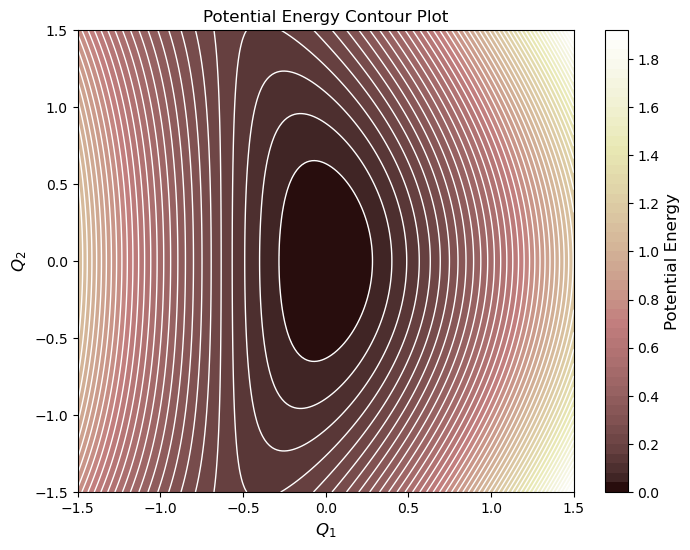

In [17]:
# Importing necessary libraries -
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Defining constants -
K1 = 1
K2 = 0.2
M1 = 1
M2 = 1
C = 0.5

# Defining the potential energy for anharmonically coupled oscillators -
def potential(Q1, Q2):
    return ((1/2) * K1 * Q1**2) + ((1/2) * K2 * Q2**2) + ((1/3) * C * Q1 * Q2**2)

# Defining the meshgrid for Q1 and Q2 -
q1 = np.linspace(-1.5, 1.5, 200)
q2 = np.linspace(-1.5, 1.5, 200)
Q1_grid, Q2_grid = np.meshgrid(q1, q2)
U_grid = potential(Q1_grid, Q2_grid)

# Creating the contour plot -
plt.figure(figsize=(8,6))
contourplot = plt.contourf(Q1_grid, Q2_grid, U_grid, levels=50, cmap='pink')
plt.contour(Q1_grid, Q2_grid, U_grid, levels=50, colors='white', linewidths=1)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.xlabel('$Q_1$', fontsize=12)
plt.ylabel('$Q_2$', fontsize=12)
plt.title('Potential Energy Contour Plot')

cbar = plt.colorbar(contourplot)
cbar.set_label('Potential Energy', fontsize=12)

plt.show()

### Plotting Trajectory of $Q_1(0) = 0$, $Q_2(0) = 1$

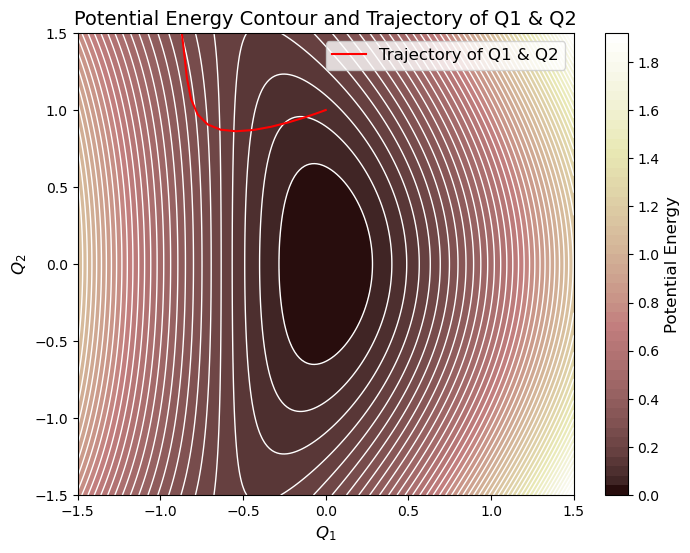

In [16]:
# Importing previous code for contour plot -

# Defining constants -
K1 = 1
K2 = 0.2
M1 = 1
M2 = 1
C = 0.5

# Defining the potential energy for anharmonically coupled oscillators -
def potential(Q1, Q2):
    return ((1/2) * K1 * Q1**2) + ((1/2) * K2 * Q2**2) + ((1/3) * C * Q1 * Q2**2)

# Defining the meshgrid for Q1 and Q2 -
q1 = np.linspace(-1.5, 1.5, 200)
q2 = np.linspace(-1.5, 1.5, 200)
Q1_grid, Q2_grid = np.meshgrid(q1, q2)
U_grid = potential(Q1_grid, Q2_grid)

# Creating the contour plot -
plt.figure(figsize=(8,6))
contourplot = plt.contourf(Q1_grid, Q2_grid, U_grid, levels=50, cmap='pink')
plt.contour(Q1_grid, Q2_grid, U_grid, levels=50, colors='white', linewidths=1)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.xlabel('$Q_1$', fontsize=12)
plt.ylabel('$Q_2$', fontsize=12)
plt.title('Potential Energy Contour Plot')

cbar = plt.colorbar(contourplot)
cbar.set_label('Potential Energy', fontsize=12)

# Defining the equations of motion -
def equations_of_motion(t, y):
    Q1, Q2, P1, P2 = y                      
    dQ1_dt = P1 / M1                         # Derivative of Q1, momentum P1 divided by mass M1
    dQ2_dt = P2 / M2                         # Derivative of Q2, momentum P2 divided by mass M2
    dP1_dt = -K1 * Q1 - C * Q2**2            # Derivative of P1, force on Q1 (restoring force & coupling force)
    dP2_dt = -K2 * Q2 - 2 * C * Q1 * Q2      # Derivative of P2, force on Q2 (restoring force & coupling force)
    return [dQ1_dt, dQ2_dt, dP1_dt, dP2_dt]

# In previous code when finding force on Q1 and Q2, I took C to absorb the 1/3 factor in the dP1_dt equation,
# making the dP2_dt make a factor of 2C instead of 2/3 C

# Defining intitial conditions -
Q1_0 = 0
Q2_0 = 1
P1_0 = 0                       # Initial velocity = 0
P2_0 = 0                       # Initial velocity = 0
y0 = [Q1_0, Q2_0, P1_0, P2_0]

# Creating meshgrid for time (t) -
t_mesh = np.linspace(0, 50, 200)

# Solving equations of motion -
sol = solve_ivp(equations_of_motion, [0, 50], y0, t_eval=t_mesh)    # Solving using scipy.integrate
Q1, Q2 = sol.y[0], sol.y[1]                                         # Initial conditions Q1 = 0, Q2 = 1

# Plotting trajectory of Q1(t) and Q2(t) -
plt.plot(Q1, Q2, color='red', label='Trajectory of Q1 & Q2')
plt.legend(fontsize=12)
plt.title('Potential Energy Contour and Trajectory of Q1 & Q2', fontsize=14)
plt.show()

### Plotting All Trajectories of $Q_1$ and $Q_2$ (For My Reference)

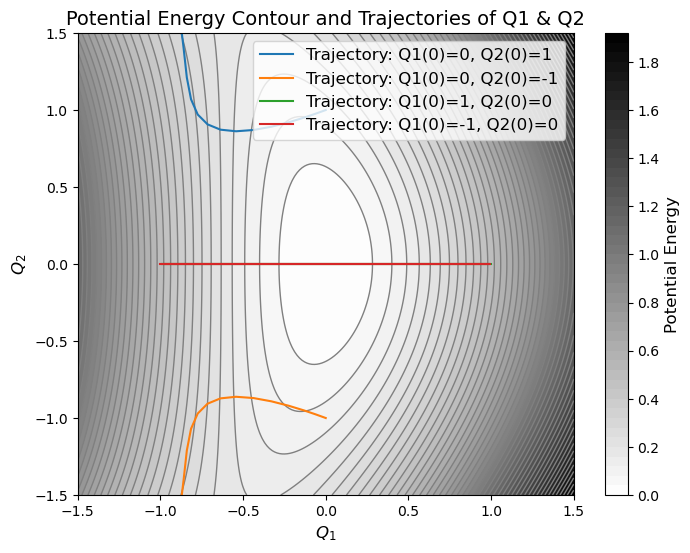

In [26]:
# Importing previous code for contour plot -

# Defining constants -
K1 = 1
K2 = 0.2
M1 = 1
M2 = 1
C = 0.5

# Defining the potential energy for anharmonically coupled oscillators -
def potential(Q1, Q2):
    return ((1/2) * K1 * Q1**2) + ((1/2) * K2 * Q2**2) + ((1/3) * C * Q1 * Q2**2)

# Defining the meshgrid for Q1 and Q2 -
q1 = np.linspace(-1.5, 1.5, 200)
q2 = np.linspace(-1.5, 1.5, 200)
Q1_grid, Q2_grid = np.meshgrid(q1, q2)
U_grid = potential(Q1_grid, Q2_grid)

# Creating the contour plot -
plt.figure(figsize=(8,6))
contourplot = plt.contourf(Q1_grid, Q2_grid, U_grid, levels=50, cmap='binary')  # Easier for me to see trajectories :)
plt.contour(Q1_grid, Q2_grid, U_grid, levels=50, colors='gray', linewidths=1)    
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.xlabel('$Q_1$', fontsize=12)
plt.ylabel('$Q_2$', fontsize=12)
plt.title('Potential Energy Contour Plot')

cbar = plt.colorbar(contourplot)
cbar.set_label('Potential Energy', fontsize=12)

# Defining the equations of motion -
def equations_of_motion(t, y):
    Q1, Q2, P1, P2 = y                      
    dQ1_dt = P1 / M1                         # Derivative of Q1, momentum P1 divided by mass M1
    dQ2_dt = P2 / M2                         # Derivative of Q2, momentum P2 divided by mass M2
    dP1_dt = -K1 * Q1 - C * Q2**2            # Derivative of P1, force on Q1 (restoring force & coupling force)
    dP2_dt = -K2 * Q2 - 2 * C * Q1 * Q2      # Derivative of P2, force on Q2 (restoring force & coupling force)
    return [dQ1_dt, dQ2_dt, dP1_dt, dP2_dt]

# Defining intitial conditions for all trajectories -
initial_conditions = [
    [0, 1, 0, 0],  # Trajectory 1: Q1(0) = 0, Q2(0) = 1
    [0, -1, 0, 0], # Trajectory 2: Q1(0) = 0, Q2(0) = -1
    [1, 0, 0, 0],  # Trajectory 3: Q1(0) = 1, Q2(0) = 0
    [-1, 0, 0, 0]  # Trajectory 4: Q1(0) = -1, Q2(0) = 0
]

# Creating meshgrid for time (t) -
t_mesh = np.linspace(0, 50, 200)

# Solving equations of motion for each trajectory -
for y0 in initial_conditions:
    # Solving equations of motion for each initial condition
    sol = solve_ivp(equations_of_motion, [0, 50], y0, t_eval=t_mesh)
    Q1, Q2 = sol.y[0], sol.y[1]

    plt.plot(Q1, Q2, label=f'Trajectory: Q1(0)={y0[0]}, Q2(0)={y0[1]}')

# Plotting trajectory of Q1(t) and Q2(t) -
plt.legend(fontsize=12)
plt.title('Potential Energy Contour and Trajectories of Q1 & Q2', fontsize=14)
plt.show()

### Physical Explanation
Why do the dynamics differ when only $Q_1$ is initially displaced compared to when only $Q_2$ is initially displaced and does this relate to the coupling term in the potential energy?

1. The motion of the anharmonic oscillator when only $Q_1$ is displaced is simple harmonic motion- because the coupling term of the potential energy depends on $Q_2$'s force on $Q_1$, if $Q_2$ remains constant at zero, there will be no force from $Q_2$ on $Q_1$, and the system will continue to behave harmonically. The only force on $Q_1$ will be the restoring force of the spring constant $K$. However, when only $Q_2$ is initially displaced and $Q_1$ is initially 0, the system at first behaves like a harmonic oscillator, similarly to the previous case, only influenced by the restoring spring constant $K$- however, because the coupling force describes $Q_2$'s motion on $Q_1$, $Q_2$ will behin to influence $Q_1$'s motion, causing $Q_1$ to begin to oscillate as well, resulting in the anharmonic motion. The difference between only initially displacing $Q_1$ versus only initially displacing $Q_2$ depends entirely on the coupling term, which describes how the displacement of one component of motion affects the other.

What is the physical interpretation of these findings?

2. Visualizing this system of anharmonically coupled oscillators as a pair of spring-masses coupled together, when the first mass (whose displacement is represented by $Q_1$) is displaced, the second mass is not affected- the force associated with the displacement of $Q_1$ does not affect $Q_2$, so the first mass would oscillate in simple harmonic motion, while the second mass would remain still at equilibrium. When the second mass (whose displacement is represented by $Q_2$) is displaced, the first mass initially is not affected, similarly to the first scenario- however, the coupling term which describes $Q_2$'s effect on $Q_1$ would then begin affect $Q_1$, causing it to move away from equilibrium and begin to oscillate as well. Coupled together, which both masses moving, the system behaves as an anharmonic oscillator, and more complex motion would be observed (compared to simple harmonic motion). 
